<a href="https://colab.research.google.com/github/smallriver0316/python-datascience-study/blob/development/kde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
def make_data(N, f=0.3, rseed=1):
  rand = np.random.RandomState(rseed)
  x = rand.randn(N)
  x[int(f * N):] += 5
  return x

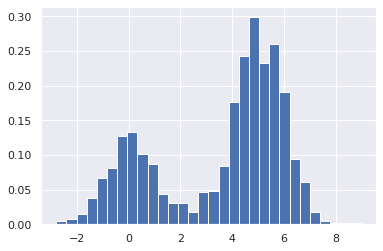

In [ ]:
x = make_data(1000)
hist = plt.hist(x, bins=30, density=True)

In [ ]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

総面積が1になるように正規化されている

In [ ]:
# binの選択を誤ると全く異なるデータに見えてしまう
x = make_data(20)
bins = np.linspace(-5, 10, 10)

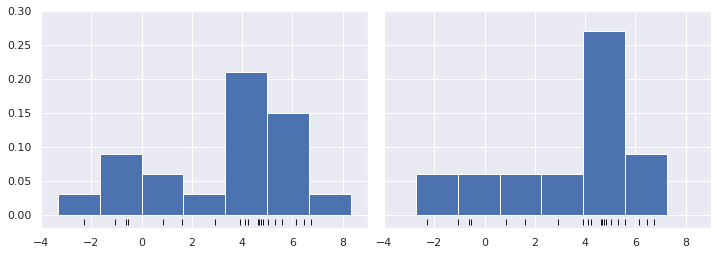

In [ ]:
fig, ax = plt.subplots(1,
                       2,
                       figsize=(12, 4),
                       sharex=True,
                       sharey=True,
                       subplot_kw={'xlim': (-4, 9), 'ylim': (-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
  ax[i].hist(x, bins=bins + offset, density=True)
  # ヒストグラム下に分布を描画
  ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

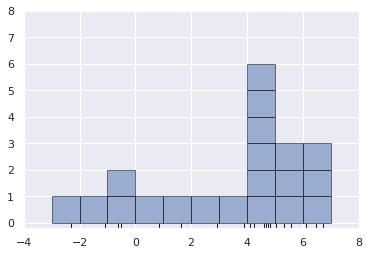

In [ ]:
# ヒストグラムをブロックの積み重ねと考える
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
  for i in range(count):
    ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha=0.5, edgecolor='black'))
  ax.set_xlim(-4, 8)
  ax.set_ylim(-0.2, 8)

(-4.0, 8.0, -0.2, 8.0)

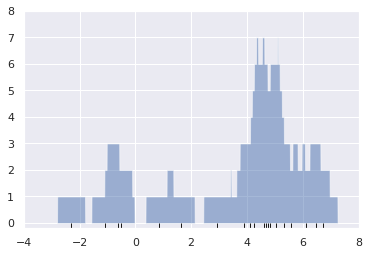

In [ ]:
# 分布に合わせてポイントを重ね合わせる
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)

# ヒストグラムを描画
plt.fill_between(x_d, density, alpha=0.5)
# ヒストグラムの下に分布位置を描画
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 8])

(-4.0, 8.0, -0.2, 5.0)

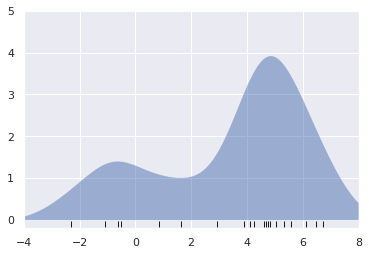

In [ ]:
# 標準正規曲線を使って滑らかにする
from scipy.stats import norm

x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 5])

(-0.02, 0.22)

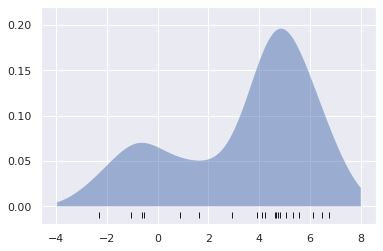

In [ ]:
# カーネル密度推定
from sklearn.neighbors import KernelDensity

kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples()は確率密度の対数を返す
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

In [ ]:
# Grid Search
# Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

# 最適なbandwidthを探索する
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=LeaveOneOut())
grid.fit(x[:, None])

GridSearchCV(cv=LeaveOneOut(), error_score=nan,
             estimator=KernelDensity(algorithm='auto', atol=0, bandwidth=1.0,
                                     breadth_first=True, kernel='gaussian',
                                     leaf_size=40, metric='euclidean',
                                     metric_params=None, rtol=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bandwidth': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.1450...
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
           

In [ ]:
grid.best_params_

{'bandwidth': 1.1233240329780276}